# EP01 - MAC0210 (Splines)

Para resolver a tarefa passada pelo professor em sala, elaboramos esse Jupyter Notebook. Alunos envolvidos:

    Victor Hugo   -------- NUSP: 10297720  
    Lucas Civile  -------- NUSP: 7083142          

Importando as bibliotecas necessárias e a classe splines definida em splines.py

In [6]:
import splines as spl
import numpy as np
import matplotlib.pyplot as plt

Função que gera uma spline base com os pesos iguais a 1 para podermos utilizar os beta_j's e resolve o sistema Mx = y, fazendo os cálculos necessários para gerar a spline final

In [11]:
def adjust_spline(timeline, x_t, num_splines, lmb):
  base_spline = spl.spline(np.ones(num_splines), x_min=timeline[0], x_max=timeline[-1])
  
  mu_aux = []
  for j in range(num_splines):
    mu_aux.append(base_spline.beta_j(j, timeline))
  mu = np.array(mu_aux).T
  
  m1 = np.dot(mu.T, mu)
  y = np.dot(mu.T, x_t.T)
  m2 = spl.matrix_m2(num_splines)
  M = m1 + lmb*m2

  adjusted = np.linalg.solve(M, y)
  return adjusted

Gera uma spline com pesos aleatórios e coloca ruídos nos pontos da spline gerada. Esses pontos com ruídos são os pontos nos quais nos baseamos para gerar a spline final que é plotada na main()

In [12]:
def points_random_noise(timeline, n_data_points, n_splines, x_min, x_max):
    # Gera pesos aleatórios e cria uma spline a partir deles
    rand_weights = np.array(np.random.rand(n_splines))
    rand_spline = spl.spline(rand_weights, x_min=timeline[0], x_max=timeline[-1])(timeline)
    
    # Adiciona ruído aos pontos da spline gerada
    sigma = np.std(rand_spline)/5
    noise = np.array(np.random.normal(0, sigma, n_data_points))
    points_generated = rand_spline + noise
    return points_generated

Função cliente, que recebe os parâmetros relevantes para testar o programa

In [13]:
def main(n_data_points = 350, n_splines = 14, lmb = 0.1, x_min = 0, x_max = 50):
    timeline = np.linspace(x_min, x_max, n_data_points)
    points = points_random_noise(timeline, n_data_points, n_splines, x_min, x_max)

    adjusted = adjust_spline(timeline, points, n_splines, lmb)

    points_with_noise = plt.scatter(timeline, points, s=3.0, color="green")

    generated_spline = plt.plot(timeline, spl.spline(adjusted, timeline[0], timeline[-1])(timeline), color='red')
    plt.show()

Nessa linha chamamos a função cliente main() com os parâmetros. 
Para testar diferentes parâmetros, basta mudar os valores passados a main(), na ordem: (número de pontos gerados,  número de splines, lambda, tempo inicial, tempo final)

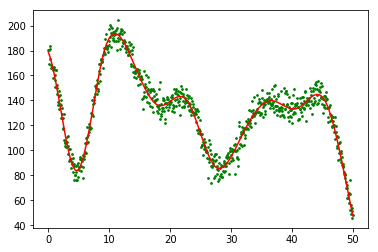

In [14]:
main(750, 14, 0.1, 0, 50)